In [1]:
## Observations and Insights

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
dups = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print (dups)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumour Volume (mm3)  Metastatic Sites  
908            45.000000                 0  
909            45.000000                 0  
910            48.786801                 0  
911            47.570392   

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_complete = pd.DataFrame(mouse_data_complete.drop(index=mouse_data_complete[mouse_data_complete['Mouse ID'] == 'g989'].index))
cleaned_mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data_complete["Mouse ID"].nunique()

248

In [9]:
## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
grouped_df=cleaned_mouse_data_complete.groupby(["Drug Regimen"])

tum_mean=grouped_df["Tumour Volume (mm3)"].mean()
tum_median=grouped_df["Tumour Volume (mm3)"].median()
tum_var=grouped_df["Tumour Volume (mm3)"].var()
tum_stdev=grouped_df["Tumour Volume (mm3)"].std()
tum_count=grouped_df["Sex"].count()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
tum=pd.DataFrame({"Mean":tum_mean,
                 "Median":tum_median,
                 "Variance":tum_var,
                 "Standard Deviation":tum_stdev})
tum["SEM"]=sem(tum["Mean"])

tum

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.777608
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.777608
Infubinol,52.884795,51.820584,43.128684,6.567243,1.777608
Ketapril,55.235638,53.698743,68.553577,8.279709,1.777608
Naftisol,54.331565,52.509285,66.173479,8.134708,1.777608
Placebo,54.033581,52.288934,61.168083,7.821003,1.777608
Propriva,52.320930,50.446266,43.852013,6.622085,1.777608
Ramicane,40.216745,40.673236,23.486704,4.846308,1.777608
Stelasyn,54.233149,52.431737,59.450562,7.710419,1.777608


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
tum.agg("mean", axis="rows")

Mean                  50.975982
Median                49.902123
Variance              47.858440
Standard Deviation     6.821103
SEM                    1.777608
dtype: float64

In [12]:
## Bar and Pie Charts

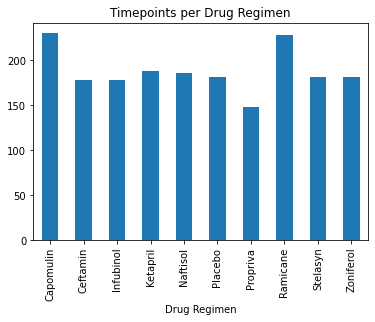

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot=cleaned_mouse_data_complete.groupby(["Drug Regimen"])
pandas_plot=pandas_plot[["Drug Regimen"]].size()

pandas_plot.plot(kind="bar",title="Timepoints per Drug Regimen")
plt.show()

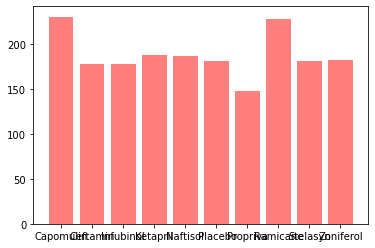

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(grouped_df))

plt.bar(x_axis, tum_count, color='r', alpha=0.5, align="center",label="Timepoints per Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", " Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.show()

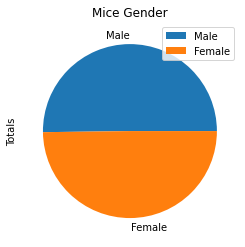

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_count=len(mouse_metadata[mouse_metadata["Sex"]=="Male"])
female_count=len(mouse_metadata[mouse_metadata["Sex"]=="Female"])

labels=["Male","Female"]
sizes=[male_count,female_count]

my_pie={"Gender":["Male","Female"],
                   "Totals":[male_count,female_count]}

pie_df=pd.DataFrame(data=my_pie)

pie_df.plot.pie(title="Mice Gender",labels=labels,y="Totals")


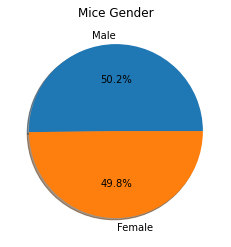

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True)
plt.title("Mice Gender")
plt.show()

In [17]:
## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = cleaned_mouse_data_complete[cleaned_mouse_data_complete['Timepoint'] == 45] 
last_df = timepoint_df[(timepoint_df["Drug Regimen"] == "Capomulin") | (timepoint_df["Drug Regimen"] == "Ramicane") | (timepoint_df["Drug Regimen"] == "Infubinol") | (timepoint_df["Drug Regimen"] == "Ceftamin")]

last_df=last_df.set_index("Drug Regimen")
last_df
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Ramicane,g791,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
Ceftamin,x822,Male,3,29,45,61.386660,3
Infubinol,y163,Female,17,27,45,67.685569,3
Ceftamin,y769,Female,6,27,45,68.594745,4


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles=last_df["Tumour Volume (mm3)"].quantile([0.25,0.5,0.75])
last_df["lowerq"]=quartiles[0.25]
last_df["upperq"]=quartiles[0.75]
last_df["iqr"]=last_df["upperq"]-last_df["lowerq"]
        

#print(f"The lower quartile of Tumour Volume is:  {lowerq}")
#print(f"The upper quartile of Tumour Volume is: {upperq}")


last_df
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,quartiles,lowerq,upperq,iqr
Drug Regimen,,,,,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1,NaN,33.480027,62.142214,28.662186
Capomulin,s185,Female,3,17,45,23.343598,1,NaN,33.480027,62.142214,28.662186
Capomulin,x401,Female,16,15,45,28.484033,0,NaN,33.480027,62.142214,28.662186
Capomulin,m601,Male,22,17,45,28.430964,1,NaN,33.480027,62.142214,28.662186
Ramicane,g791,Male,11,16,45,29.128472,1,NaN,33.480027,62.142214,28.662186
...,...,...,...,...,...,...,...,...,...,...,...
Ceftamin,x822,Male,3,29,45,61.386660,3,NaN,33.480027,62.142214,28.662186
Infubinol,y163,Female,17,27,45,67.685569,3,NaN,33.480027,62.142214,28.662186
Ceftamin,y769,Female,6,27,45,68.594745,4,NaN,33.480027,62.142214,28.662186


In [20]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

In [21]:
## Line and Scatter Plots

Text(0, 0.5, 'Tumour Size (mm3)')

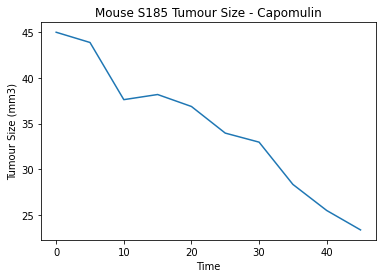

In [22]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
line_x=[]
for x in cleaned_mouse_data_complete["Timepoint"]:
    if x not in line_x:
        line_x.append(x)
        

line_y=[]
s185=cleaned_mouse_data_complete[(cleaned_mouse_data_complete["Mouse ID"] == "s185")]

for y in s185["Tumour Volume (mm3)"]:
    if y not in line_y:
        line_y.append(y)
        
plt.plot(line_x,line_y)
plt.title("Mouse S185 Tumour Size - Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumour Size (mm3)")

In [23]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

capo=cleaned_mouse_data_complete[(cleaned_mouse_data_complete["Drug Regimen"] == "Capomulin")]

capo_mouse=capo.groupby(["Mouse ID","Weight (g)"])

mouse_tummean=capo_mouse["Tumour Volume (mm3)"].mean()

new_mouse=pd.DataFrame({"Average Tumour Volume":mouse_tummean})

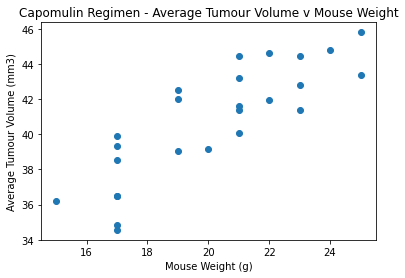

In [24]:
new_mouse1=new_mouse.reset_index()

new_mouse1.head()
x_scatter=new_mouse1["Weight (g)"]
y_scatter=new_mouse1["Average Tumour Volume"]

plt.scatter(x_scatter, y_scatter)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Capomulin Regimen - Average Tumour Volume v Mouse Weight")
plt.show()

In [25]:
## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

#correlation coeff
correlation=st.pearsonr(x_scatter,y_scatter)
print(f"The correction between both factors is {round(correlation[0],2)}")

The correction between both factors is 0.84


The r-squared is: 0.7088568047708717


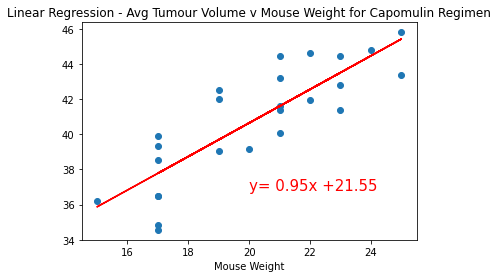

In [27]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter,y_scatter)
regress_values = x_scatter * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_scatter,y_scatter)
plt.plot(x_scatter,regress_values,"r-")
plt.annotate(line_eq,(20,36.8),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel=("Average Tumour Volume (mm3)")
plt.title("Linear Regression - Avg Tumour Volume v Mouse Weight for Capomulin Regimen")
print(f"The r-squared is: {rvalue**2}")